<a href="https://colab.research.google.com/github/scmenezes/Exp.Pyhton/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_A3_Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install wooldridge
import wooldridge as woo
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.compat import lzip
!pip install openpyxl
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import reset_ramsey

In [ ]:
from os import rename
url = 'https://github.com/user-attachments/files/17535133/base.3.xlsx'
dados = pd.read_excel(url, engine='openpyxl')
dados = dados.rename(columns={'LN (PL)': 'LNPL'})
dados['NPL2'] = dados['NPL']**2
dados.head()

,Banco,Data,CAR,NPL,OEE,OEA,NPM,ROA,ROE,LDR,GAP,LNPL,NPL2
0,ABC-BRASIL - PRUDENCIAL,01/03/2015,0.1418,0.005505,0.921871,0.048033,0.337526,0.013520,0.137432,2.273738,0.294694,6.357152,0.000030
1,ABC-BRASIL - PRUDENCIAL,01/06/2015,0.148,0.006903,0.906518,0.051512,0.034312,0.002273,0.022478,2.087783,0.316286,6.368324,0.000048
2,ABC-BRASIL - PRUDENCIAL,01/09/2015,0.1457,0.008960,0.957599,0.022030,-1.099624,-0.033681,-0.366542,2.211927,0.320475,6.387535,0.000080
3,ABC-BRASIL - PRUDENCIAL,01/12/2015,0.1618,0.009675,0.924366,0.037147,-0.197628,-0.013869,-0.133723,2.311428,0.337879,6.399615,0.000094
4,ABC-BRASIL - PRUDENCIAL,01/03/2016,0.1715,0.010241,0.713493,0.099475,-3.500967,-0.007947,-0.070892,2.721443,0.319613,6.419933,0.000105


In [ ]:
colunas_com_faltantes = dados.columns[dados.isnull().any()].tolist()
print(colunas_com_faltantes)
dados['CAR'] = pd.to_numeric(dados['CAR'], errors='coerce')

imputer = SimpleImputer(strategy='mean')
dados['CAR'] = imputer.fit_transform(dados[['CAR']])
dados['NPM'] = imputer.fit_transform(dados[['NPM']])
dados['ROA'] = imputer.fit_transform(dados[['ROA']])
dados['ROE'] = imputer.fit_transform(dados[['ROE']])
dados['OEE'] = imputer.fit_transform(dados[['OEE']])

['CAR', 'NPL', 'OEE', 'OEA', 'NPM', 'ROA', 'ROE', 'LDR', 'GAP', 'LNPL', 'NPL2']


In [ ]:
dados['Banco'] = dados['Banco'].apply(lambda x: 1 if x in ['CAIXA ECONÔMICA FEDERAL - PRUDENCIAL','BB - PRUDENCIAL', 'BANRISUL - PRUDENCIAL','BANESTES - PRUDENCIAL','BCO DA AMAZONIA S.A. - PRUDENCIAL','BCO DO NORDESTE DO BRASIL S.A. - PRUDENCIAL'] else 0)

In [ ]:
formula3 = 'CAR ~ ROA + OEE + NPL+ ROE + GAP + LNPL + NPL2 + Banco'
results3 = smf.ols(formula3, dados).fit(cov_type='HAC',cov_kwds={'maxlags':6,'use_correction':True})
print(results3.summary())
y_fitted = results3.fittedvalues
residuals3 = results3.resid

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     7.982
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.18e-10
Time:                        16:18:23   Log-Likelihood:                 377.99
No. Observations:                2228   AIC:                            -738.0
Df Residuals:                    2219   BIC:                            -686.6
Df Model:                           8                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6470      0.088      7.323      0.0

# ETAPA 1

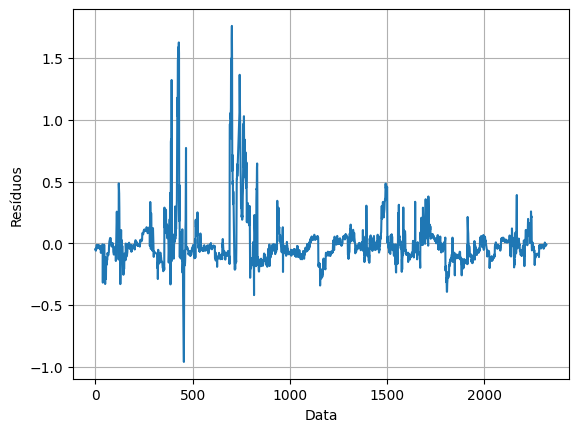

In [ ]:
plt.figure(1)
plt.plot(results3.resid)
plt.xlabel('Data')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

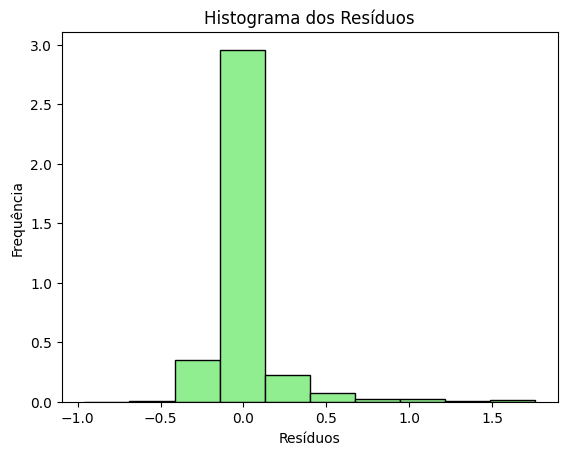

In [ ]:
# Obtendo os resíduos
residuos = results3.resid

# Gerando o histograma dos resíduos
plt.hist(residuos, color='lightgreen', edgecolor='black', density=True)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()

###### COLOCAR UMA LINHA DA NORMAL  ################

# ETAPA II

## Parte I

In [ ]:
# DataFrame 'df' com as variáveis independentes
X = dados[['ROA', 'ROE', 'OEE', 'NPL', 'GAP', 'LNPL', 'NPL2', 'Banco']]
X = sm.add_constant(X)  # Adiciona uma constante à matriz de dados

# Handle missing or infinite values in X
# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Drop rows with any missing values
X = X.dropna()

# Calcula o VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Variável'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variável        VIF
0    const  49.258900
1      ROA   1.112897
2      ROE   1.078039
3      OEE   1.064459
4      NPL   3.470992
5      GAP   1.004988
6     LNPL   1.155337
7     NPL2   3.424700
8    Banco   1.067698


## Parte II

In [ ]:
from statsmodels.stats.outliers_influence import reset_ramsey
reset_ramsey(results3,degree=4)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=13.775215413859287, p=6.686922735796665e-09, df_denom=2.22e+03, df_num=3>

## Parte III

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Vamos aproveitar a matriz X criada anteriormente, e criar agora o vetor y para a variável dependente
y = dados['CAR']

# Para implementar a ACP, é necessário padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Verificando se há uma coluna constante (todas as entradas são iguais)
print("Matriz X escalonada original:")
print(X_scaled)

Matriz X escalonada original:
[[ 0.00000000e+00  4.30464608e-01  1.09385677e-01 ...  2.69110776e-01
  -1.44403671e-01 -3.00032614e-01]
 [ 0.00000000e+00  2.82825414e-02 -3.46456567e-02 ...  2.80878681e-01
  -1.43893568e-01 -3.00032614e-01]
 [ 0.00000000e+00 -1.25743107e+00 -5.22066217e-01 ...  3.01113495e-01
  -1.42934197e-01 -3.00032614e-01]
 ...
 [ 0.00000000e+00  1.91732112e-01  2.39417179e-02 ...  1.10109126e+00
  -1.14003401e-01 -3.00032614e-01]
 [ 0.00000000e+00  3.53028895e-02 -3.28662330e-02 ...  1.10142728e+00
  -1.21778756e-01 -3.00032614e-01]
 [ 0.00000000e+00  1.36997542e-01  1.02731337e-05 ...  1.10700628e+00
  -1.24816243e-01 -3.00032614e-01]]


In [ ]:
# Remover a constante da matriz (se houver)
X_scaled_no_const = X_scaled[:, ~np.all(X_scaled == X_scaled[0, :], axis=0)]  # Remove as colunas com valores iguais

# Verificando o resultado após a remoção
print("\nMatriz X escalonada sem a constante:")
print(X_scaled_no_const)


Matriz X escalonada sem a constante:
[[ 4.30464608e-01  1.09385677e-01  1.37374389e+00 ...  2.69110776e-01
  -1.44403671e-01 -3.00032614e-01]
 [ 2.82825414e-02 -3.46456567e-02  1.31457342e+00 ...  2.80878681e-01
  -1.43893568e-01 -3.00032614e-01]
 [-1.25743107e+00 -5.22066217e-01  1.51143778e+00 ...  3.01113495e-01
  -1.42934197e-01 -3.00032614e-01]
 ...
 [ 1.91732112e-01  2.39417179e-02  5.49660615e-01 ...  1.10109126e+00
  -1.14003401e-01 -3.00032614e-01]
 [ 3.53028895e-02 -3.28662330e-02  5.20484959e-01 ...  1.10142728e+00
  -1.21778756e-01 -3.00032614e-01]
 [ 1.36997542e-01  1.02731337e-05  6.14261843e-01 ...  1.10700628e+00
  -1.24816243e-01 -3.00032614e-01]]


In [ ]:
# Aplicando PCA e selecionando o número de componentes
X_scaled = X_scaled_no_const
pca = PCA(n_components=2)  # Estima 2 componentes principais
X_pca = pca.fit_transform(X_scaled) #Implementa o PCA na matriz padronizada

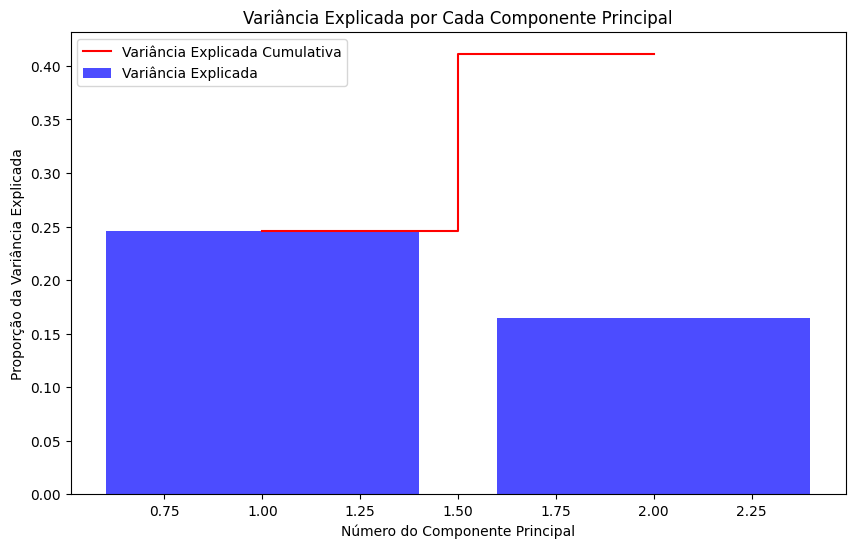

In [ ]:
# Variância explicada por cada componente e variância cumulativa
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Criar um DataFrame com a variância explicada e a variância cumulativa
variance_df = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Variância Explicada (%)': explained_variance * 100,
    'Variância Cumulativa (%)': cumulative_variance * 100
})

# Gráfico de barras para variância explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='b', label='Variância Explicada')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', color='r', label='Variância Explicada Cumulativa')
plt.xlabel('Número do Componente Principal')
plt.ylabel('Proporção da Variância Explicada')
plt.title('Variância Explicada por Cada Componente Principal')
plt.legend(loc='best')
plt.show()

In [ ]:
variaveis = ['ROA', 'ROE', 'OEE', 'NPL', 'GAP', 'LNPL', 'NPL2', 'Banco']
X_df = pd.DataFrame(X_scaled, columns=variaveis) #converte uma matriz Numpy em um DataFrame pandas

# Visualizando os loadings (composição dos componentes principais)
loadings =pca.components_.T  # Transpor para facilitar a interpretação

# Transformar as loadings em um DataFrame para melhor visualização:
loadings_df = pd.DataFrame(loadings, index=X_df.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Exibir as loadings
print(loadings_df)

            PC1       PC2
ROA   -0.153725  0.583888
ROE    0.046067  0.420428
OEE   -0.238281  0.151867
NPL    0.649019  0.210142
GAP    0.023248  0.036737
LNPL  -0.267738  0.464854
NPL2   0.641437  0.214327
Banco -0.112146  0.389508


In [ ]:
# Ajustando o modelo de regressão linear Ortogonal usando apenas o primeiro componente principal
# Selecionar apenas o primeiro componente principal (PC1) para a regressão
X_pc1 = X_pca[:, 0].reshape(-1, 1)  # Seleciona apenas a primeira coluna (PC1)
X_pc1 = sm.add_constant(X_pc1)
print(X_pc1)

[[ 1.         -0.75759959]
 [ 1.         -0.67688211]
 [ 1.         -0.5325262 ]
 ...
 [ 1.         -0.4563425 ]
 [ 1.         -0.47722859]
 [ 1.         -0.55139006]]


In [ ]:
# Ajustando o modelo de regressão linear Ortogonal usando apenas o primeiro componente principal
# Selecionar apenas o primeiro componente principal (PC1) para a regressão
X_pc1 = X_pca[:, 0].reshape(-1, 1)  # Seleciona apenas a primeira coluna (PC1)
print
# Adicionar uma constante para o intercepto
X_pc1 = sm.add_constant(X_pc1)

print(f"Tamanho de y: {y.shape}")
print(f"Tamanho de X_pc1: {X_pc1.shape}")


Tamanho de y: (2321,)
Tamanho de X_pc1: (2228, 2)


In [ ]:
# Ajustar o modelo de regressão linear usando apenas o primeiro componente principal (PC1)
reg_Ortogonal = sm.OLS(y, X_pc1).fit()
print(reg_Ortogonal.summary())

ValueError: endog and exog matrices are different sizes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Criando o vetor y com as variáveis dependentes
y = dados[['ROA', 'ROE', 'OEE', 'NPL', 'GAP', 'LNPL', 'NPL2', 'Banco']]

# Padronizar os dados de X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificando se há uma coluna constante (todas as entradas são iguais)
print("Matriz X escalonada original:")

# Remover a constante da matriz (se houver)
X_scaled_no_const = X_scaled[:, ~np.all(X_scaled == X_scaled[0, :], axis=0)]  # Remove as colunas com valores iguais

# Verificando o resultado após a remoção
print("\nMatriz X escalonada sem a constante:")
print(X_scaled_no_const)

# Aplicando PCA e selecionando o número de componentes
pca = PCA(n_components=2)  # Estima 2 componentes principais
X_pca = pca.fit_transform(X_scaled_no_const)  # Implementa o PCA na matriz padronizada

# Variância explicada por cada componente e variância cumulativa
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Criar um DataFrame com a variância explicada e a variância cumulativa
variance_df = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Variância Explicada (%)': explained_variance * 100,
    'Variância Cumulativa (%)': cumulative_variance * 100
})

# Gráfico de barras para variância explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='b', label='Variância Explicada')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', color='r', label='Variância Explicada Cumulativa')
plt.xlabel('Número do Componente Principal')
plt.ylabel('Proporção da Variância Explicada')
plt.title('Variância Explicada por Cada Componente Principal')
plt.legend(loc='best')
plt.show()

# Convertendo a matriz escalonada para DataFrame para fácil visualização
variaveis = ['ROA', 'ROE', 'OEE', 'NPL', 'GAP', 'LNPL', 'NPL2', 'Banco']
X_df = pd.DataFrame(X_scaled_no_const, columns=variaveis)

# Visualizando os loadings (composição dos componentes principais)
loadings = pca.components_.T  # Transpor para facilitar a interpretação

# Transformar as loadings em um DataFrame para melhor visualização
loadings_df = pd.DataFrame(loadings, index=X_df.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Exibir as loadings
print(loadings_df)

# Ajustando o modelo de regressão linear Ortogonal usando apenas o primeiro componente principal
# Se o número de linhas de y e X_pca não corresponder, o código falhará
X_pc1 = X_pca[:, 0].reshape(-1, 1)  # Seleciona apenas o primeiro componente principal (PC1)

# Agora, X_pc1 deve ter o mesmo número de observações que y
print(f"Tamanho de X_pc1: {X_pc1.shape}")
print(f"Tamanho de y: {y.shape}")

# Se for necessário rodar para cada variável dependente, você pode ajustar o código abaixo para cada variável.
for i in range(y.shape[1]):  # Para cada coluna de y (para cada variável dependente)
    y_single = y.iloc[:, i]  # Seleciona a coluna de y
    X_pc1_const = sm.add_constant(X_pc1)  # Adiciona uma constante para o intercepto

    # Ajustar o modelo de regressão linear para cada variável dependente
    reg_Ortogonal = sm.OLS(y_single, X_pc1_const).fit(cov_type='HAC', cov_kwds={'maxlags': 6, 'use_correction': True})

    print(f"Resultado da regressão para {y.columns[i]}:")
    print(reg_Ortogonal.summary())


# ETAPA 3

In [ ]:
# Obtendo os resíduos studentizados
studres = results3.get_influence().resid_studentized_external

# Encontrando os índices das observações com os maiores resíduos studentizados em valor absoluto
n_outliers = 5  # Número de outliers a serem exibidos
outlier_indices = np.argsort(np.abs(studres))[-n_outliers:]

#Criando uma função 'analisar_outliers' para apresentar os 5 maiores outliers do modelo estimado
def analisar_outliers(data, formula_modelo, variaveis_interesse, n_outliers=5):
  """
  Analisa outliers em um modelo de regressão com base nos resíduos studentizados.

  Args:
    data: DataFrame pandas contendo os dados.
    formula_modelo: Fórmula do modelo de regressão no formato statsmodels.
    variaveis_interesse: Lista de nomes das colunas das quais se deseja obter os valores para os outliers.
    n_outliers: Número de outliers a serem exibidos (default=5).

  Returns:
    Exibe as observações com os maiores resíduos studentizados.
  """
  # Regressão MQO:
  reg = smf.ols(formula=formula_modelo, data=data) # Using formula_modelo and data parameters
  results3 = reg.fit()

  # Obtendo os resíduos studentizados (movido para dentro da função)
  studres = results3.get_influence().resid_studentized_external

  # Encontrando os índices das observações com os maiores resíduos studentizados em valor absoluto (movido para dentro da função)
  outlier_indices = np.argsort(np.abs(studres))[-n_outliers:]

  # Exibindo as observações com os maiores resíduos studentizados
  print("Observações com os maiores resíduos studentizados:")
  for i in outlier_indices:
      # Accessing columns using a list of column names
      valores = data[variaveis_interesse[:2]].iloc[i].to_dict()
      print(f"Índice: {i}, Resíduo Studentizado: {studres[i]:.4f}, Valores: {valores}")

# Exemplo de uso:
# Carregando os dados (substitua pelo seu dataset)
data = dados #substitua pelo seu dataframe

# Definindo a fórmula do modelo (substitua pela sua fórmula)
formula_modelo = 'CAR ~ ROA + ROE + OEE + NPL + GAP + LNPL + NPL2 + Banco'

# Definindo as variáveis de interesse
variaveis_interesse = ["Banco","NPL2","LNPL","GAP", "NPL", "OEE", "ROE", "ROA", "CAR"]

# Analisando os outliers
analisar_outliers(data, formula_modelo, variaveis_interesse)

In [ ]:
# histograma (e densidade sobreposta):
kde = sm.nonparametric.KDEUnivariate(studres)
kde.fit()
plt.hist(studres, color='orange',edgecolor='black', density=True)
plt.plot(kde.support, kde.density, color='black', linewidth=2)
plt.ylabel('densidade')
plt.xlabel('studresid')


######## TABELA DE REGRESSÃO ###################

In [ ]:
# Sumário das medidas de influência
influencia = results3.get_influence()
summary_influencia = influencia.summary_frame()

# Selecionando apenas as principais medidas de influência
# Substituindo 'dfbeta' pelas colunas individuais de DFBETA para cada preditor
principais_medidas = summary_influencia[
    [
        "cooks_d",  # Distância de Cook
        "dffits",  # DFFITS
        "dfb_ROA",  # DFBETA para 'sales'
        "dfb_ROE",  # DFBETA para 'profmarg'
        "dfb_OEE",  # DFBETA para 'sales'
        "dfb_NPL",
        "dfb_GAP",  # DFBETA para 'sales'
        "dfb_LNPL",
        "dfb_NPL2",  # DFBETA para 'sales'
        "dfb_Banco",
        "student_resid",  # Resíduos studentizados
    ]
]

# Exibindo as principais medidas
print(principais_medidas)

In [ ]:
# Definindo as variáveis independentes (X) e dependentes (Y)
X = dados[['ROA' , 'ROE' , 'OEE' , 'NPL' , 'GAP' , 'LNPL' , 'NPL2' , 'Banco']]
X = sm.add_constant(X)  # Adicionando uma constante para o intercepto
y = dados['CAR']

##############################################################
X = X.replace([np.inf, -np.inf], np.nan)  # Substitui infinitos por NaNs
X = X.dropna()  # Remove linhas com NaNs

# Removendo as linhas correspondentes em y
y = y[X.index]
##########################################################################
# Cria e ajusta o modelo de regressão
model = sm.OLS(y, X).fit() # cria e ajusta o modelo

# Número de observações e variáveis
n = X.shape[0]
p = X.shape[1]

# Limiares para identificar outliers:
# Distância de Cook
cook_threshold = 4 / n
# DFFIT: Usando 2 * sqrt(p/n)
dffit_threshold = 2 * np.sqrt(p / n)

# Obtém as medidas de influência do modelo ajustado
influence = model.get_influence()

# Extrai a distância de Cook
cooks_distance = influence.cooks_distance[0] # extrai a distância de Cook

# Extrai o DFFITS
dffits = influence.dffits[0] # extrai o DFFITS

# Extrai o DFBETA
dfbeta = influence.dfbetas # extrai o DFBETA


# Destacar outliers com base nos limiares
outliers_cooks = np.where(cooks_distance > cook_threshold)[0]
outliers_dffits = np.where(np.abs(dffits) > dffit_threshold)[0]
outliers_dfbetas = np.where(np.abs(dfbeta) > 2)[0]  # Limite arbitrário de 2 para DFBETA
outliers_studres = np.where(np.abs(studres) > 3)[0]  # Limite arbitrário de 3 para resíduos studentizados

# Mostrar os índices dos outliers
print("Outliers com base na Distância de Cook:", outliers_cooks)
print("Outliers com base no DFFIT:", outliers_dffits)
print("Outliers com base no DFBETA:", outliers_dfbetas)
print("Outliers com base no StudRes", outliers_studres)

In [ ]:
# Visualização (Destacar os outliers no gráfico de Cook's Distance)
plt.scatter(range(n), cooks_distance, label='Distância de Cook')
plt.axhline(y=cook_threshold, color='r', linestyle='--', label='Limiar de Cook')
plt.scatter(outliers_cooks, cooks_distance[outliers_cooks], color='red', label='Outliers de Cook')
plt.xlabel('Observações')
plt.ylabel('Distância de Cook')
plt.legend()
plt.show()

In [ ]:
# Criando uma variável dummy para os outliers
outlier_series = pd.Series(np.zeros(len(dados)), index=dados.index)  # Initialize with 0s
outlier_series[X.index] = np.where(cooks_distance > cook_threshold, 1, 0) # Assign outlier values for the filtered data


# Adicionando a variável dummy no dataframe
dados['OutlierDummy'] = outlier_series

# Visualização da variável dummy
print("Dados com Dummy para Outliers:")
print(dados)


In [ ]:
# Ajustar o modelo incluindo a variável dummy

dados.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any missing values in the original dataframe
# Alternatively, you can impute the missing values using various methods
dados.dropna(inplace=True)

# Ensure both dataframes have the same index before aligning:
dados_outliers = dados[['ROA' , 'ROE' , 'OEE' , 'NPL' , 'GAP' , 'LNPL' , 'NPL2' , 'Banco','OutlierDummy']]

# Instead of resetting index, filter dados_outliers using y's existing index
dados_outliers = dados_outliers[dados_outliers.index.isin(y.index)]

# Now y and dados_outliers have consistent rows
# Add constant for the intercept
dados_outliers = sm.add_constant(dados_outliers)

# Fit the model with the dummy variable and aligned data
modelo_com_dummy = sm.OLS(y.loc[dados_outliers.index], dados_outliers).fit(cov_type='HAC',cov_kwds={'maxlags':6,'use_correction':True}) # Use y values aligned with dados_outliers

# Resultados do novo modelo
print("\nResumo do Modelo com Dummy para Outliers:")
print(modelo_com_dummy.summary())

In [ ]:
# Obtendo os resíduos
residuos2 = modelo_com_dummy.resid

# Gerando o histograma dos resíduos
plt.hist(residuos2, color='gray',edgecolor='black', density=True)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.plot(kde.support, kde.density, color='black', linewidth=2)
plt.title("Histograma dos Resíduos após ajuste com dummies")
plt.show()

# Variaveis padronizadas

In [ ]:
# Ajustar o modelo com variáveis padronizadas
betareg = smf.ols(formula='CAR ~ ROA + OEE + NPL+ ROE + GAP + LNPL + NPL2 + Banco', data=dados)
results_betareg = betareg.fit(cov_type='HAC',cov_kwds={'maxlags':6,'use_correction':True})

# Resultados do novo modelo
print("\nResumo do Modelo com variáveis padronizadas:")
print(results_betareg.summary())

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler  # Import RobustScaler

# Assuming 'Data' is the column with dates
# Select only numerical features for scaling
numerical_features = dados.select_dtypes(include=['number']).columns
robust_scaler = RobustScaler()  # Create an instance of RobustScaler
dados_robust = robust_scaler.fit_transform(dados[numerical_features])

# Create a DataFrame with the scaled numerical features
dados_robust_df = pd.DataFrame(dados_robust, columns=numerical_features, index=dados.index)  # Preserve original index

# Concatenate the scaled numerical features with the original non-numerical features
dados_robust_df = pd.concat([dados.drop(columns=numerical_features), dados_robust_df], axis=1)

display(dados_robust_df.head())
display(dados_robust_df.head())

In [ ]:
dados_med = smf.ols(formula='CAR ~ ROA + OEE + NPL+ ROE + GAP + LNPL + NPL2 + Banco', data=dados_robust_df)
results_ER = dados_med.fit(cov_type='HAC',cov_kwds={'maxlags':6,'use_correction':True})

# Resultados do novo modelo
print("\nResumo do Modelo com Escalonamento Robusto:")
print(results_ER.summary())


In [ ]:
res = smf.quantreg('CAR ~ ROA + OEE + NPL+ ROE + GAP + LNPL + NPL2 + Banco', dados).fit(q=0.5)
print(res.summary())